<br><font face = "Verdana" size = "2"> <b>Name :- Kundan Patil  DS0522
<br>email id:-patilkundan.1718@gmail.com
    
<br><font face = "Verdana" size = "4"> <b> Evaluation Project - 1
<br><font face = "Verdana" size = "2"> <b> Baseball Case Study
<br><font face = "Verdana" size = "2"> <b> Problem Statement:
<br><font face = "Verdana" size = "2"> <b> This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 
<br><font face = "Verdana" size = "2"> <b> 
<br><font face = "Verdana" size = "2"> <b> -- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors
<br><font face = "Verdana" size = "2"> <b> 
<br><font face = "Verdana" size = "2"> <b> -- Output: Number of predicted wins (W)
<br><font face = "Verdana" size = "2"> <b> 
<br><font face = "Verdana" size = "2"> <b> To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics
<br><font face = "Verdana" size = "2"> <b> 
<br><font face = "Verdana" size = "2"> <b> For downloading the dataset, use the link given below. 
<br><font face = "Verdana" size = "2"> <b> 
<br><font face = "Verdana" size = "2"> <b> Downlaod Files:
<br><font face = "Verdana" size = "2"> <b> https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

In [1]:
#Let's start with importing necessary Libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

 <hr><font face = "Verdana" size = "4"> <b> 1) importing  data

In [2]:
#importing  data 
df = pd.read_csv(r"C:\Users\Kundan Patil\DS0522\Evaluation Phase- Batch DS0522\Data-Science-ML-Capstone-Projects-master\baseball.csv") # Reading the data file

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


<hr><font face = "Verdana" size = "4"> <b> 2) check data type of each column

In [4]:
#  check  data type of each column 
df.dtypes


W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

<font face = "Verdana" size = "2"> <b>No need to change the datatype,they are accurate so we will skip the data conversion step ,Now Now directly jumps to EDA

In [5]:
df.shape

(30, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


<hr><font face = "Verdana" size = "4"> <b> 3) Checking Null Values in DataFrame

In [7]:
# Checking Null Values in DataFrame
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<font face = "Verdana" size = "4"> <b> There are no null values in data set ✓<hr>

<font face = "Verdana" size = "4"> <b> 4) check  the duplicate

In [8]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


<font face = "Verdana" size = "4"> <b> there is no duplicate value in data set ✅ <hr>

<font face = "Verdana" size = "4"> <b>5) check the descriptive statistics about data set

In [9]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<hr><font face = "Verdana" size = "4"> <b>  understanding the columns name 

<font face = "Verdana" size = "2"><br>R: Runs,
<font face = "Verdana" size = "2"><br>
<font face = "Verdana" size = "2"><br>AB: At Bats
<font face = "Verdana" size = "2"><br>
<font face = "Verdana" size = "2"><br>H: Hits
<font face = "Verdana" size = "2"><br>
<font face = "Verdana" size = "2"><br>2B: Doubles
<font face = "Verdana" size = "2"><br>
<font face = "Verdana" size = "2"><br>3B: Triples
<font face = "Verdana" size = "2"><br>
<font face = "Verdana" size = "2"><br>HR: Homeruns
<font face = "Verdana" size = "2"><br>
<font face = "Verdana" size = "2"><br>BB: Walks
<font face = "Verdana" size = "2"><br>
<font face = "Verdana" size = "2"><br>SO: Strikeouts
<font face = "Verdana" size = "2"><br>
<font face = "Verdana" size = "2"><br>SB: Stolen Bases
<font face = "Verdana" size = "2"><br>
<font face = "Verdana" size = "2"><br>RA: Runs Allowed
<font face = "Verdana" size = "2"><br>
<font face = "Verdana" size = "2"><br>ER: Earned Runs
<font face = "Verdana" size = "2"><br>
<font face = "Verdana" size = "2"><br>ERA: Earned Run Average (ERA)
<font face = "Verdana" size = "2"><br>
<font face = "Verdana" size = "2"><br>CG: Shutouts
<font face = "Verdana" size = "2"><br>
<font face = "Verdana" size = "2"><br>SV: Saves,
<font face = "Verdana" size = "2"><br>
<font face = "Verdana" size = "2"><br>SV: Complete Games
<font face = "Verdana" size = "2"><br>
<font face = "Verdana" size = "2"><br>E: Errors
<font face = "Verdana" size = "2"><br>
<font face = "Verdana" size = "2"><br>W: Win

<hr><font face = "Verdana" size = "4"> <b> 6) Performing EDA

In [10]:
def EDA(df,i): # creat a function  
    plt.figure(figsize=(20,5),facecolor='#FFCBA4')
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i,y='W',data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()

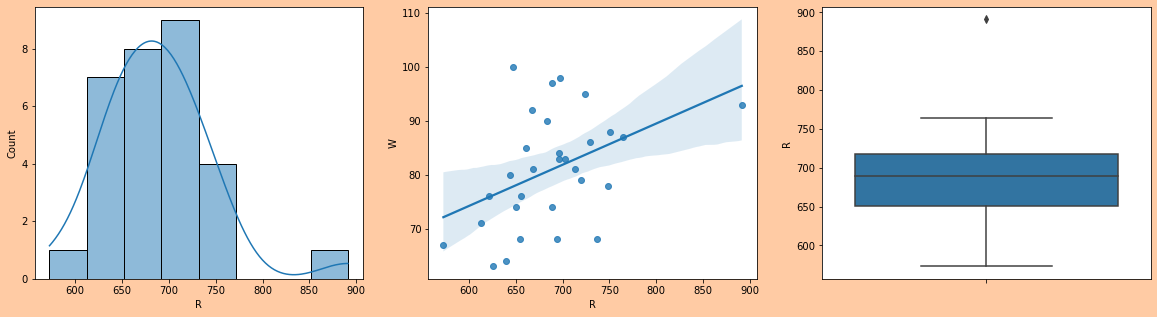

In [11]:
EDA(df,'R')

<br><font face = "Verdana" size = "2"> <b> Obervation:
  <br>  1) Run and win are linearly correlated
 <br>   2) There are outliers present between 850 and 900

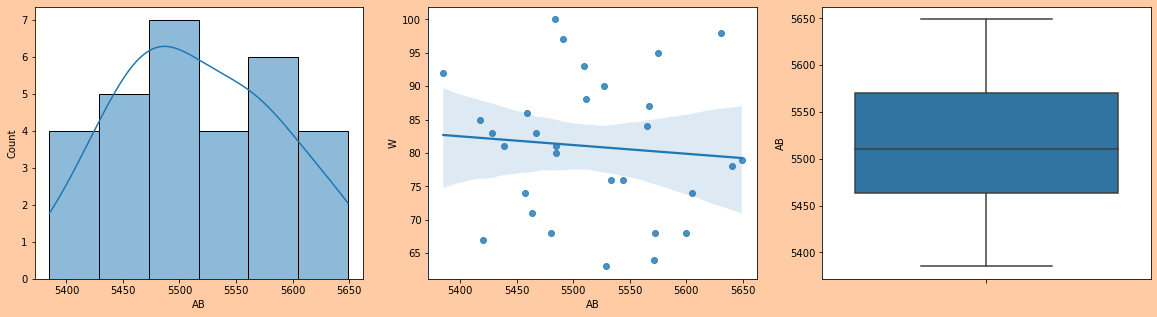

In [12]:
EDA(df,'AB')

<br><font face = "Verdana" size = "2"> <b> Obervation:
  <br>  1) ball and win arr less correlated
 <br>   2) There are no outliers present 

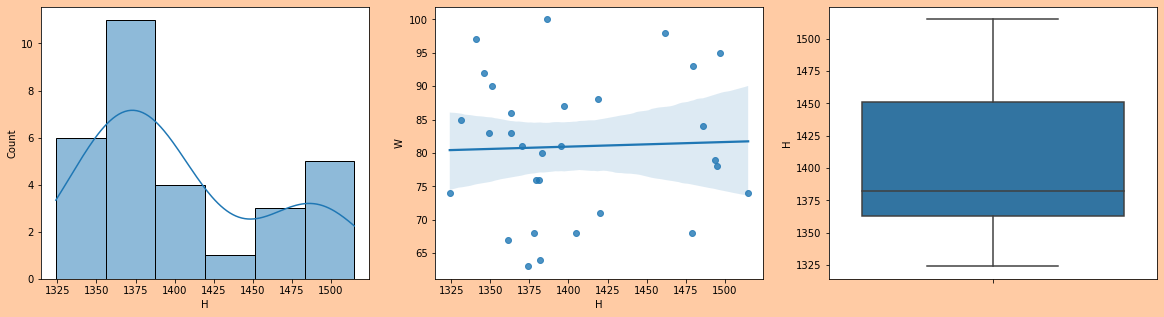

In [13]:
EDA(df,'H')

<br><font face = "Verdana" size = "2"> <b> Obervation:
  <br>  1)  less correlated
 <br>   2)  no outliers present 

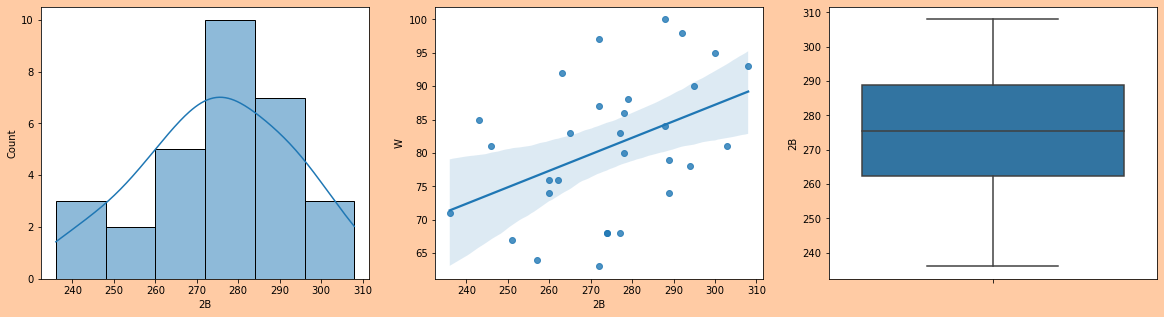

In [14]:
EDA(df,'2B')

<br><font face = "Verdana" size = "2"> <b> Obervation:
  <br>  1)  Highly correlated
 <br>   2)  no outliers present 

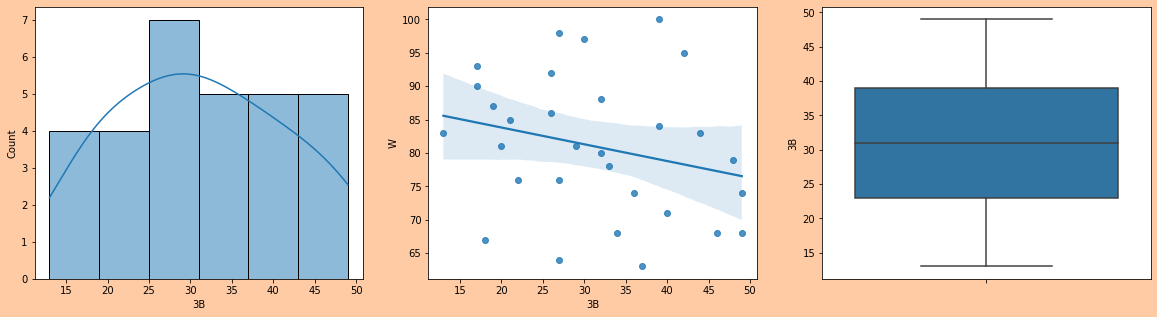

In [15]:
EDA(df,'3B')

<br><font face = "Verdana" size = "2"> <b> Obervation:
  <br>  1)  Negative correlation
 <br>   2)  no outliers present

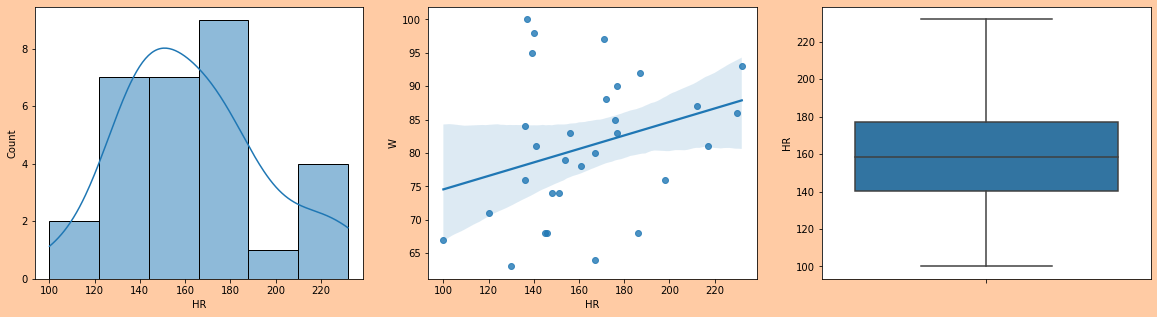

In [16]:
EDA(df,'HR')

<br><font face = "Verdana" size = "2"> <b> Obervation:
  <br>  1)  Less +ve correlation
 <br>   2)  no outliers present

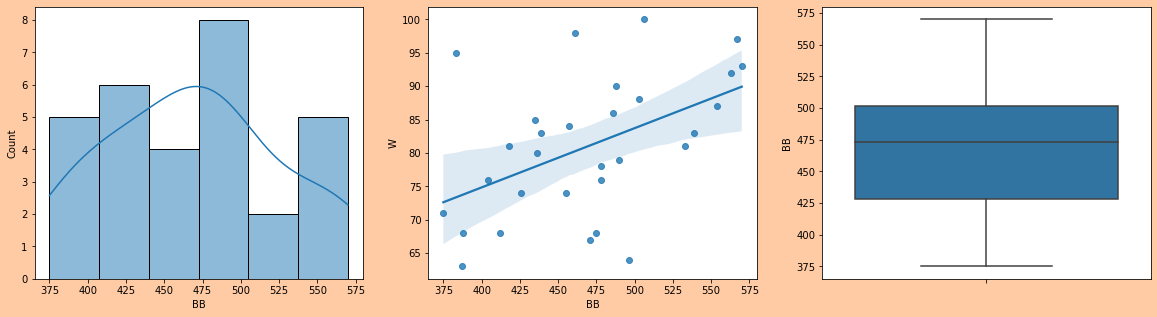

In [17]:
EDA(df,'BB')

<br><font face = "Verdana" size = "2"> <b> Obervation:
  <br>  1)  strong  correlation
 <br>   2)  no outliers present

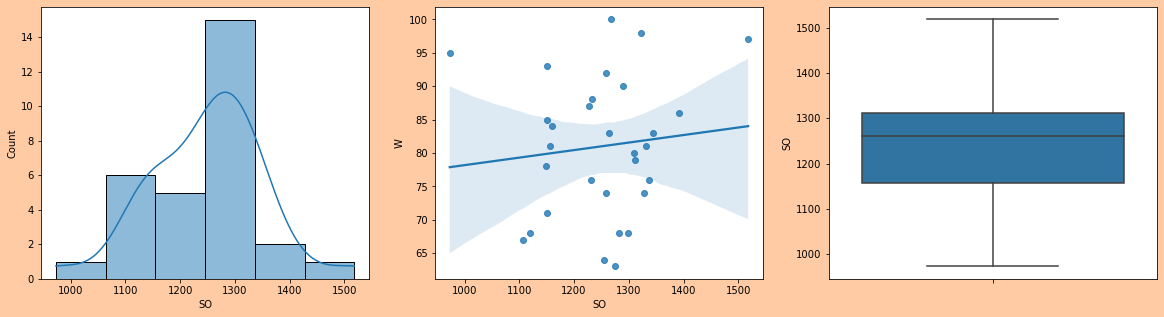

In [18]:
EDA(df,'SO')

<br><font face = "Verdana" size = "2"> <b> Obervation:
  <br>  1)  very less correlation
 <br>   2)  no outliers present

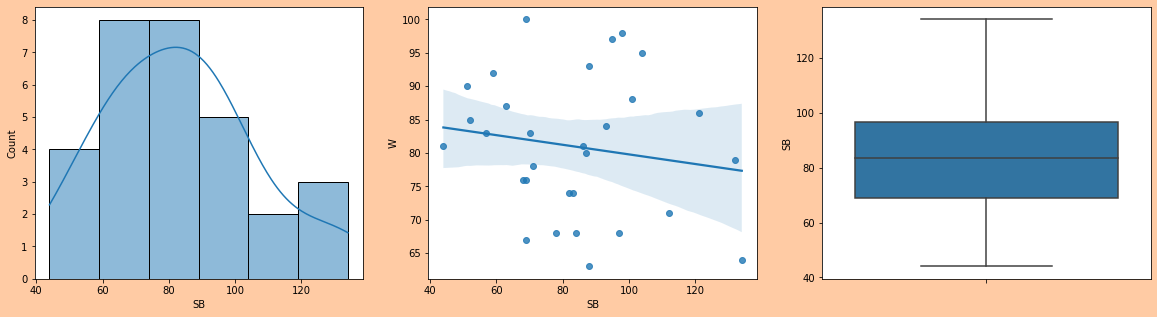

In [19]:
EDA(df,'SB')

<br><font face = "Verdana" size = "2"> <b> Obervation:
  <br>  1)  no correlation
 <br>   2)  no outliers present

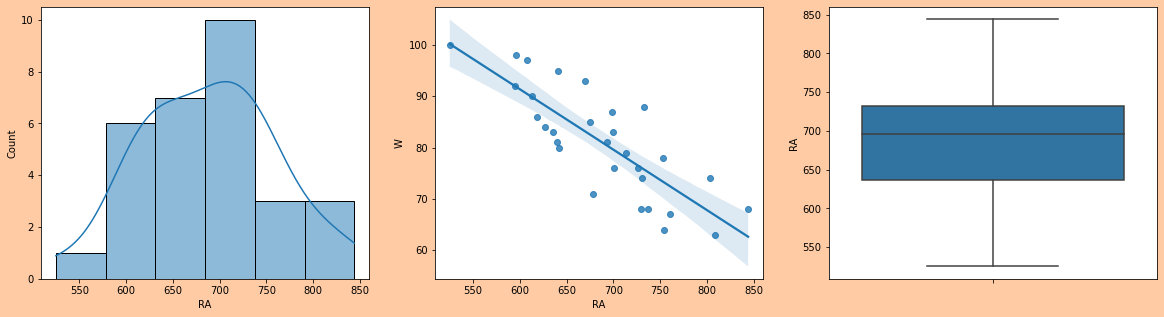

In [20]:
EDA(df,'RA')

<br><font face = "Verdana" size = "2"> <b> Obervation:
  <br>  1)  highly correlation
 <br>   2)  no outliers present

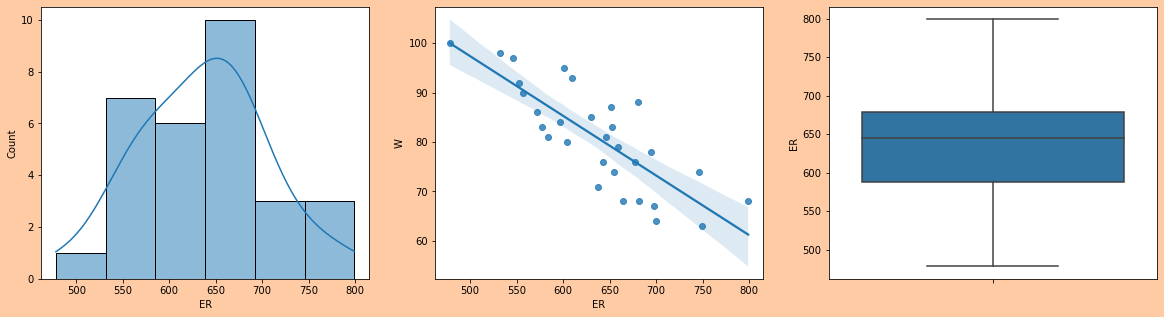

In [21]:
EDA(df,'ER')

<br><font face = "Verdana" size = "2"> <b> Obervation:
  <br>  1)  highly correlation
 <br>   2)  no outliers present

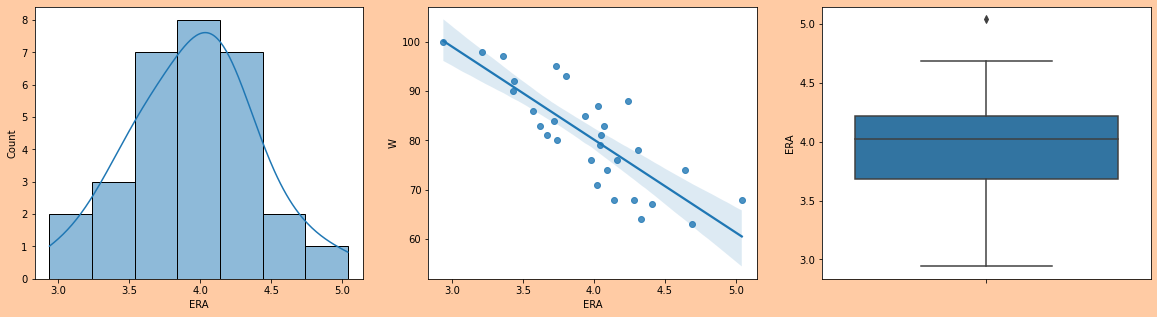

In [22]:
EDA(df,'ERA')

<br><font face = "Verdana" size = "2"> <b> Obervation:
  <br>  1)  highly correlation
 <br>   2)  no outliers present

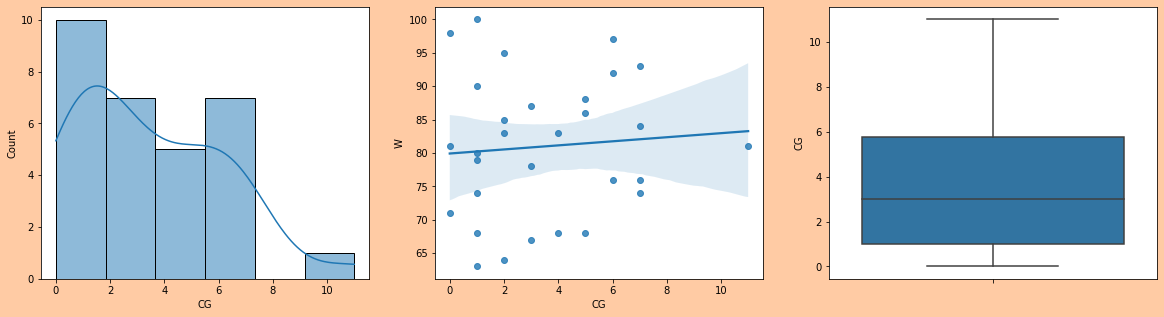

In [23]:
EDA(df,'CG')

<br><font face = "Verdana" size = "2"> <b> Obervation:
  <br>  1)  no correlation
 <br>   2)  no outliers present
    <br>      3)  data is right-skewed

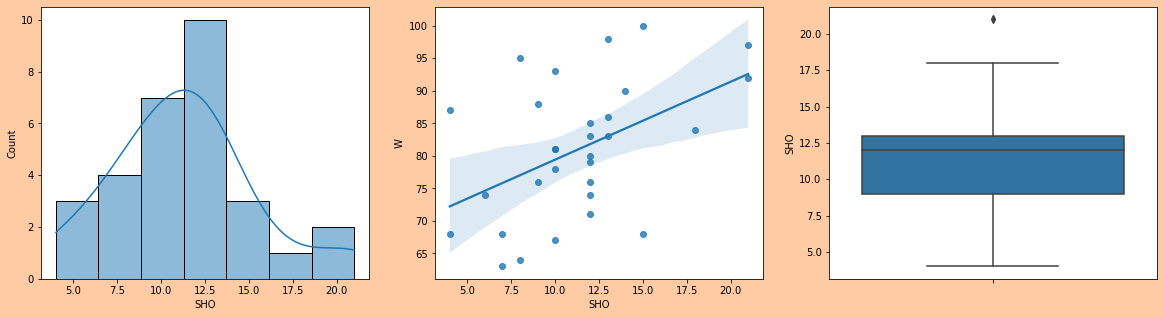

In [24]:
EDA(df,'SHO') 

<br><font face = "Verdana" size = "2"> <b> Obervation:
  <br>  1)  there is  correlation
 <br>   2)  minor outliers present
    <br>       

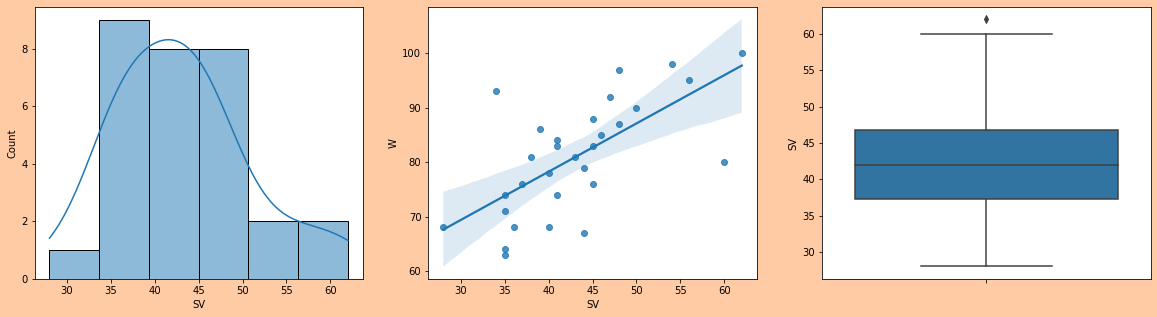

In [25]:
EDA(df,'SV') 

<br><font face = "Verdana" size = "2"> <b> Obervation:
  <br>  1)  there is  correlation
 <br>   2)  minor outliers present
    <br>       

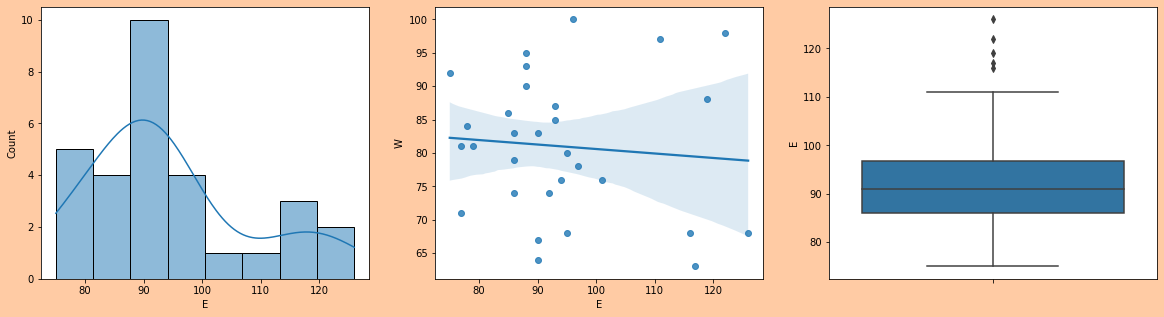

In [26]:
EDA(df,'E') 

<br><font face = "Verdana" size = "2"> <b> Obervation:
  <br>  1)  there is no  correlation
 <br>   2)  some outliers present
    <br> 

<br><font face = "Verdana" size = "2"> <b>Based on our obervation</b>  we say that 
There is positive correlation of
   <br> (R : runs, HR:home runs, 2B:doubles, SV:Saves, CG:Shutouts) with W: win 
    <br> and negative correlation with 
   <br> SB: Stolen Bases, RA:Runs Allowed, ER: Earned Runs 








 <font face = "Verdana" size = "4"> <b>7) Removing the Outliers by using Zscore method

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df.shape[0]-df1.shape[0])/df.shape[0])

percentage of loss of data by zscore is : 0.03333333333333333


<font face = "Verdana" size = "4"> <b> 8) Separating features and lable

In [28]:
f = df1.drop('W', axis=1) #f for features
l = df1.W #l for label

<font face = "Verdana" size = "4"> <b> 9) Checking for the multicollinearity

In [29]:
#Checking for the multicollinearity
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def CalculateVIF(Data):
 # Calculating VIF
    vif = dict()
    vif["FeatureColumns"] = Data.columns
    vif["VIF"] = [variance_inflation_factor(Data.values, i) for i in range(Data.shape[1])]
    return(pd.DataFrame(vif))



CalculateVIF(df1)

,FeatureColumns,VIF
0,W,1136.419542
1,R,3372.620602
2,AB,5149.560597
3,H,4646.411583
4,2B,1109.169779
5,3B,35.766244
6,HR,289.402974
7,BB,295.570400
8,SO,400.617550
9,SB,28.931744


In [30]:
#ploting the heatmap

<AxesSubplot:>

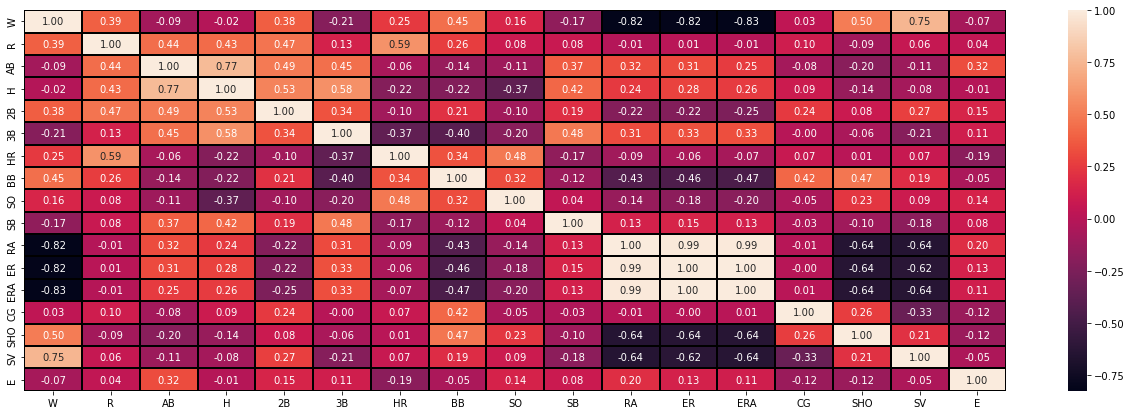

In [31]:
plt.figure(figsize=(22,7)) # ploting the heat map
sns.heatmap(df1.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

<font face = "Verdana" size = "4"> <b> 10) with the following function we can select highly correlated features

In [32]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [33]:
corr_features = correlation(df1, 0.5)
len(set(corr_features))

9

In [34]:
corr_features #highly correlated features name

{'2B', '3B', 'ER', 'ERA', 'H', 'HR', 'RA', 'SHO', 'SV'}

<font face = "Verdana" size = "2"> <b>  Correlation of column with the target column 

In [35]:
df1.corr()['W'].sort_values()

ERA   -0.826952
RA    -0.823176
ER    -0.815308
3B    -0.206737
SB    -0.169503
AB    -0.085780
E     -0.072858
H     -0.018360
CG     0.029594
SO     0.156469
HR     0.245697
2B     0.384886
R      0.390451
BB     0.447513
SHO    0.497526
SV     0.749290
W      1.000000
Name: W, dtype: float64

In [36]:
f.corrwith(l) # Correlation of column with the target column

R      0.390451
AB    -0.085780
H     -0.018360
2B     0.384886
3B    -0.206737
HR     0.245697
BB     0.447513
SO     0.156469
SB    -0.169503
RA    -0.823176
ER    -0.815308
ERA   -0.826952
CG     0.029594
SHO    0.497526
SV     0.749290
E     -0.072858
dtype: float64

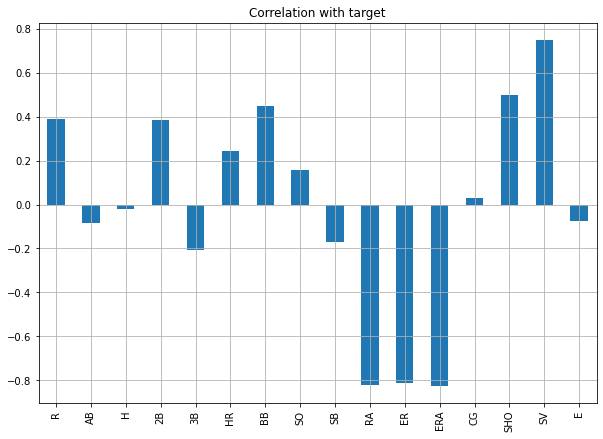

In [37]:
f.corrwith(l).plot(kind='bar',grid=True,figsize=(10,7), # Correlation with lable by graphical representation
title='Correlation with target')
plt.show()

In [38]:
df2=df1.drop(labels=corr_features,axis=1)

In [39]:
CalculateVIF(df2)

,FeatureColumns,VIF
0,W,95.444183
1,R,332.077292
2,AB,445.912600
3,BB,136.135889
4,SO,173.859694
5,SB,15.692887
6,CG,3.416512
7,E,51.623016


<font face = "Verdana" size = "4"> <b> 11) Data Scaling Standard Scaler

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scale=StandardScaler() #only to the feature 

In [42]:
f1=scale.fit_transform(f)

In [43]:
f1.shape

(29, 16)

In [44]:
f.shape

(29, 16)

In [45]:
f1

array([[ 0.95939835,  0.83008422,  1.73830631,  1.55653766,  1.01084549,
        -0.76586314, -1.53635899, -2.72762331,  0.9059529 , -0.66451353,
        -0.51114812, -0.51138828, -0.50148589, -0.81326172,  1.64315663,
        -0.47109143],
       [ 0.33114717, -0.70283074, -0.93869788,  0.20117132,  1.20891656,
        -0.18138864, -0.49502051,  0.12189552, -0.58531515,  0.15463823,
         0.23216082,  0.23895226, -0.50148589,  0.15929869,  0.21100645,
        -0.61489829],
       [-0.27466646, -1.10025314, -0.10665604,  1.73332457, -0.2766165 ,
        -0.69710144,  1.25294051, -0.9258657 ,  0.11645805, -0.67839746,
        -0.75415297, -0.64380131,  2.85461197, -0.32698152, -0.70036184,
        -1.1182223 ],
       [-1.32923093,  0.23395062, -0.35988616, -0.8006212 , -0.47468758,
        -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,  0.16852216,
         0.08921679,  0.04033271,  1.36301292, -0.57012162, -0.83055731,
         0.46365315],
       [ 0.17408438,  1.25589393,  2

<font face = "Verdana" size = "4"> <b> 12)  Split data into train and test

In [46]:
maxAccu=0
lrm=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(f1,l,test_size=0.3,random_state=i)
    lrm = LinearRegression()
    lrm.fit(x_train, y_train)
    pred=lrm.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.9125242537047673 on random state 104


In [47]:
x_train,x_test,y_train,y_test=train_test_split(f1,l,test_size=0.3,random_state=104)

<font face = "Verdana" size = "2"> <b> Model instantiating and training

In [48]:
lrm = LinearRegression()
lrm.fit(x_train, y_train)

LinearRegression()

In [49]:
df.tail (2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


<font face = "Verdana" size = "2"> <b> Predict the chance of admission given features

In [50]:
# Since we have already fit the scaler, you can transform the data
print ('Chance of Admission is',lrm.predict (scale.transform ([[650, 5457, 1324, 260, 36, 148, 426,1327,82,731,655,4.09,1,6,41,92]])))

Chance of Admission is [79.75048809]


<font face = "Verdana" size = "2"> <b> On the traning data our model is predicting 98%

<font face = "Verdana" size = "2"> <b>  Let's check how well model fits on train data

In [51]:
# Adjusted R2 score # .score is nothing but Adjusted R2 score
# when we have multiple feature that time we check Adjusted R2 score
lrm.score (x_train,y_train)

0.9474734932435736

<font face = "Verdana" size = "2"> <b>Let's check how well model fits the test data.

In [52]:
lrm.score(x_test,y_test)

0.9125242537047673

<font face = "Verdana" size = "2"> <b> ➤ Now our model performance is 94 % for training data set and 91 % for the test data set. 

In [53]:
y_pred = lrm.predict(x_test)
y_pred

array([90.34536321, 60.90903157, 65.63334636, 83.54419271, 78.17145526,
       87.66184042, 69.07278284, 95.42178544, 79.75048809])

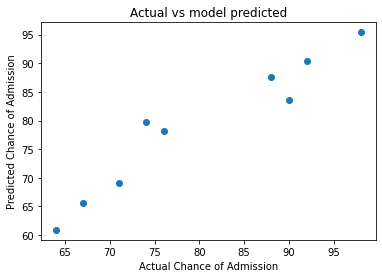

In [54]:
plt.scatter (y_test,y_pred)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predicted Chance of Admission')
plt.title('Actual vs model predicted')
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [56]:
y_pred = lrm.predict(x_test)

In [57]:
#MAE
mean_absolute_error(y_test,y_pred)


2.8148445328021583

In [58]:
#MSE
mean_squared_error(y_test,y_pred)


11.566237565702995

In [59]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

3.4009171653692176

<font face = "Verdana" size = "4"> Let's see if our model is overfitting our training data.<br>
<font face = "Verdana" size = "4"> Regularization <br>
<font face = "Verdana" size = "4">
<font face = "Verdana" size = "4">1) It is a  techniques that are used to <b>calibrate</b> machine learning models<br>
<font face = "Verdana" size = "4">2) It is a technique to prevent the model from overfitting by adding extra information to it.<br>
<font face = "Verdana" size = "4">3) It is a technique that used to fix overfitting problem<br>
<font face = "Verdana" size = "4"> <b><hr></b>
    Types of Regularization <br>
<font face = "Verdana" size = "4">1) Lasso( Least Absolute Shrinkage and Selection Operator) / L1 form<br>
<font face = "Verdana" size = "4">2) Ridge(L2form)<br>

In [60]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

<font face = "Verdana" size = "4"><b>  1) Lasso( Least Absolute Shrinkage and Selection Operator) / L1 form</b></font><br />

In [61]:
# LassoCV will return best alpha after max iteration
# Normalize is subtracting the mean and dividing by the L2-norm
lasscv = LassoCV (alphas = None, max_iter = 100, normalize = True) # normalize is similer to standerized the data
lasscv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

<font face = "Verdana" size = "2"><b> 1.1) best alpha parameter/best learning rate</b></font><br />

In [62]:
# best alpha parameter/best learning rate
alpha= lasscv.alpha_
alpha

0.23783485423242867

<font face = "Verdana" size = "2"><b>1.2) now that we have best parameter, Let's use Lasso regression and see how well our data has fitted before
</b></font><br />

In [63]:
lasso_reg = Lasso (alpha)
lasso_reg. fit (x_train, y_train)

Lasso(alpha=0.23783485423242867)

<font face = "Verdana" size = "2"><b>1.3) Let's use Lasso regression score </b></font><br />

In [64]:
lasso_reg.score(x_test,y_test)

0.9118503099095718

<font face = "Verdana" size = "4"><b>  2) Using Ridge regression model</b></font><br />
<font face = "Verdana" size = "2"> RidgeCV will return best alpha and coefficients after performing 10 cross validations.</font><br />

In [65]:
ridgecv=RidgeCV (alphas = np.arange (0.001,0.1,0.01), normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [66]:
ridgecv.alpha_

0.09099999999999998

In [67]:
ridge_model= Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.09099999999999998)

In [68]:
ridge_model.score(x_test, y_test)

0.9135872039276436

<font face = "Verdana" size = "2"> <b>Conlussion </b>We got around same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.<br>
<font face = "Verdana" size = "2"><mark>1)lasso_reg.scor = 0.9118503099095718<br>
<font face = "Verdana" size = "2">2)ridge_model.score = 0.9135872039276436<br>
    <font face = "Verdana" size = "2">3)regression.score = 0.9125242537047673<br></mark>
</font><br />
 <font face = "Verdana" size = "2">   
<font face = "Verdana" size = "2">    So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the
<font face = "Verdana" size = "2"> training data and there is no overfitting.

</font><br />

<font face = "Verdana" size = "2"><b> We can save the model and later we can use it for prediction

In [314]:
import pickle

In [316]:
# saving the model to the local file system
pickle.dump (lrm, open('lrm_model', 'wb'))

In [311]:
print('x train shape:',x_train.shape)
print('x test shape',x_test.shape)
print('\n')
print('y train shape:',y_train.shape)
print('y test shape',y_test.shape)

x train shape: (20, 16)
x test shape (9, 16)


y train shape: (20,)
y test shape (9,)


<font face = "Verdana" size = "4"><b> Building the multiple model

In [317]:
#linear model
lrm=LinearRegression()
lrm.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.935
RMSE: 2.557
mean absolute error: 2.033


In [50]:
#lasso model
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predls)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predls)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predls)),3))

r2 score is : 0.883
RMSE: 3.928
mean absolute error: 3.115


In [51]:
#Ridge model
rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrd)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrd)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrd)),3))

r2 score is : 0.912
RMSE: 3.408
mean absolute error: 2.712


In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [53]:
rf = RandomForestRegressor(n_estimators=1995)
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrf)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf)),3))

r2 score is : 0.607
RMSE: 7.204
mean absolute error: 5.545


In [54]:
#Ridge model
rd=Ridge(alpha=0.01)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrd)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrd)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrd)),3))

r2 score is : 0.906
RMSE: 3.518
mean absolute error: 2.84


In [55]:
svr = SVR()
svr.fit(x_train, y_train)
predsvr=svr.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predsvr)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predsvr)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predsvr)),3))

r2 score is : 0.09
RMSE: 10.968
mean absolute error: 10.189


In [70]:
#models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score

In [71]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
svr=SVR()
rfr=RandomForestRegressor()
lasso=Lasso()
ridge=Ridge()

In [72]:
list1=[lr,dtr,knr,svr,rfr,lasso,ridge]

In [73]:
myscore=0
maxrs=0
print(lr)
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(f1,l,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    score=lr.score(x_train,y_train)
    if score>myscore:
        myscore=score
        maxrs=i
print("Best Score:-",myscore,"\nRandom State:-",maxrs)

LinearRegression()
Best Score:- 0.9996553824097767 
Random State:- 128


In [74]:
myscore=0
maxrs=0
print(dtr)
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(f,l,test_size=.30,random_state=i)
    dtr.fit(x_train,y_train)
    score=dtr.score(x_train,y_train)
    if score>myscore:
        myscore=score
        maxrs=i
print("Best Score:-",myscore,"\nRandom State:-",maxrs)

DecisionTreeRegressor()
Best Score:- 1.0 
Random State:- 1


In [75]:
myscore=0
maxrs=0
print(knr)
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(f1,l,test_size=.30,random_state=i)
    knr.fit(x_train,y_train)
    score=knr.score(x_train,y_train)
    if score>myscore:
        myscore=score
        maxrs=i
print("Best Score:-",myscore,"\nRandom State:-",maxrs)

KNeighborsRegressor()
Best Score:- 0.8542377075548736 
Random State:- 64


In [77]:
myscore=0
maxrs=0
print(svr)
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(f1,l,test_size=.20,random_state=i)
    svr.fit(x_train,y_train)
    score=svr.score(x_train,y_train)
    if score>myscore:
        myscore=score
        maxrs=i
print("Best Score:-",myscore,"\nRandom State:-",maxrs)

SVR()
Best Score:- 0.32669807009383944 
Random State:- 31


In [78]:
myscore=0
maxrs=0

print(rfr)
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(f1,l,test_size=.40,random_state=i)
    rfr.fit(x_train,y_train)
    score=rfr.score(x_train,y_train)
    if score>myscore:
        myscore=score
        maxrs=i
print("Best Score:-",myscore,"\nRandom State:-",maxrs)

RandomForestRegressor()
Best Score:- 0.9776318143432506 
Random State:- 64


In [79]:
myscore=0
maxrs=0

print(lasso)
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(f1,l,test_size=.350,random_state=i)
    lasso.fit(x_train,y_train)
    score=lasso.score(x_train,y_train)
    if score>myscore:
        myscore=score
        maxrs=i
print("Best Score:-",myscore,"\nRandom State:-",maxrs)

Lasso()
Best Score:- 0.96415854884376 
Random State:- 58


In [80]:
myscore=0
maxrs=0

print(ridge)
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(f1,l,test_size=.35,random_state=i)
    ridge.fit(x_train,y_train)
    score=ridge.score(x_train,y_train)
    if score>myscore:
        myscore=score
        maxrs=i
print("Best Score:-",myscore,"\nRandom State:-",maxrs)

Ridge()
Best Score:- 0.9954066776755018 
Random State:- 118
